# Image Resizing 
## Table of Contents
- [Introduction](#introduction)
- [Choosing and Reading the Image](#choosing-and-reading-the-image)
- [Plotting the Image and Its Histogram](#plotting-the-image-and-its-histogram)
- [Task 1: Upsampling](#task-1-upsampling)
  - [Upsampling Technique 1: Nearest Neighbor (Implemented from Scratch)](#upsampling-technique-1-nearest-neighbor-implemented-from-scratch)
  - [Upsampling Technique 2: Bilinear Interpolation](#upsampling-technique-2-bilinear-interpolation)
  - [Upsampling Technique 3: Laznczos Interpolation](#upsampling-technique-3-Lanczos-interpolation)
  - [Visual Comparison of Upsampling Techniques](#visual-comparison-of-upsampling-techniques)
- [Task 2: Downsampling](#task-2-downsampling)
  - [Downsampling Technique 1: gaussian](#downsampling-technique-1-gaussian)
  - [Downsampling Technique 2: Bilinear Interpolation](#downsampling-technique-2-bilinear-interpolation)
  - [Downsampling Technique 3: Bicubic Interpolation](#downsampling-technique-3-bicubic-interpolation)
  - [Visual Comparison of Downsampling Techniques](#visual-comparison-of-downsampling-techniques)
- **Extra** 
  - visualize the difference between gaussian downsampling and lanczos upsampling 
  - visualize the difference between gaussian downsampling and lanczos upsampling histograms




## Introduction
In this document, we will explore various image resizing techniques. The process will involve both upsampling and downsampling methods, and we will compare the results visually. 

# Import libraries

In [176]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Choosing and Reading the Image

In [177]:
image_path = './IMG.jpg'  
image = cv2.imread(image_path) 

## Plotting the Image and Its Histogram

In [178]:
# function to plot images and histograms
def plot_image_and_histogram(image, title):
        plt.figure(figsize=(10, 5))

(-0.5, 1199.5, 1599.5, -0.5)

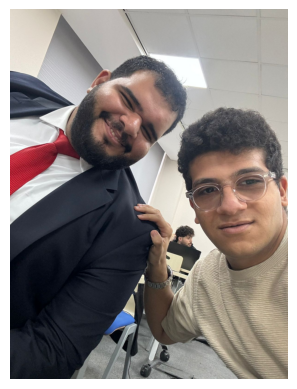

In [179]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

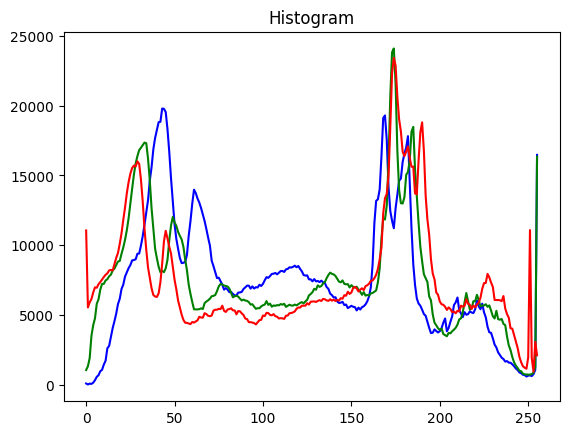

In [180]:
# Plot histogram
plt.subplot(1, 1, 1)
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Histogram')
plt.show()

# Upsampling

## Upsampling Technique 1: Nearest Neighbor 

In [181]:
# Nearest Neighbor Upsampling (Implemented from scratch)
def nearest_neighbor_upsample(image, scale):
     h, w = image.shape[:2]
     new_h, new_w = h * scale, w * scale
     upsampled_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
     for i in range(new_h):
         for j in range(new_w):
             x = i // scale
             y = j // scale
             upsampled_image[i, j] = image[x, y]
    
     return upsampled_image

## Upsampling Technique 2: Bilinear Interpolation

In [182]:
#  Bilinear Upsampling (Using OpenCV)
bilinear_upsampled_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

## Upsampling Technique 3: Lanczos Interpolation

In [183]:
# lanczos Upsampling (Using OpenCV)
upsampled_image_lanczos = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LANCZOS4)

In [184]:
# Perform Nearest Neighbor Upsampling
nearest_neighbor_upsampled_image = nearest_neighbor_upsample(image, 2)

## Visual Comparison of Upsampling Techniques

Upsampled images saved successfully


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

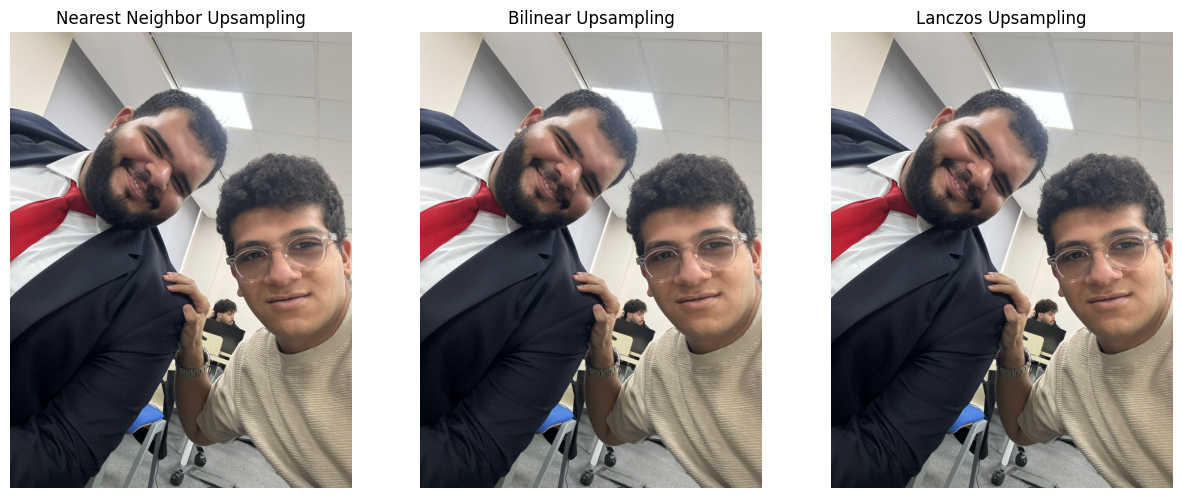

In [185]:
# Plot upsampled images
plot_image_and_histogram(nearest_neighbor_upsampled_image, 'Nearest Neighbor Upsampling')
plot_image_and_histogram(bilinear_upsampled_image, 'Bilinear Upsampling')
plot_image_and_histogram(upsampled_image_lanczos, 'Lanczos Upsampling')

# Save images

cv2.imwrite('nearest_neighbor_upsampled_image.jpg', nearest_neighbor_upsampled_image)
cv2.imwrite('bilinear_upsampled_image.jpg', bilinear_upsampled_image)
cv2.imwrite('Lanczos_upsampled_image.jpg', upsampled_image_lanczos)
print('Upsampled images saved successfully')

# Display images 
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(nearest_neighbor_upsampled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Nearest Neighbor Upsampling')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(bilinear_upsampled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bilinear Upsampling')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(upsampled_image_lanczos, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Lanczos Upsampling')

plt.show()

# Downsampling

## Downsampling Technique 1: Gaussian

In [186]:
downsampled_image_gaussian = cv2.pyrDown(image)

## Downsampling Technique 2: Bilinear Interpolation


In [187]:
# Bilinear Downsampling (Using OpenCV)
bilinear_downsampled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

## Downsampling Technique 3: Bicubic Interpolation


In [188]:
# Bicubic Downsampling (Using OpenCV)
bicubic_downsampled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

## Visual Comparison of Downsampling Techniques

Downsampled images saved successfully


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

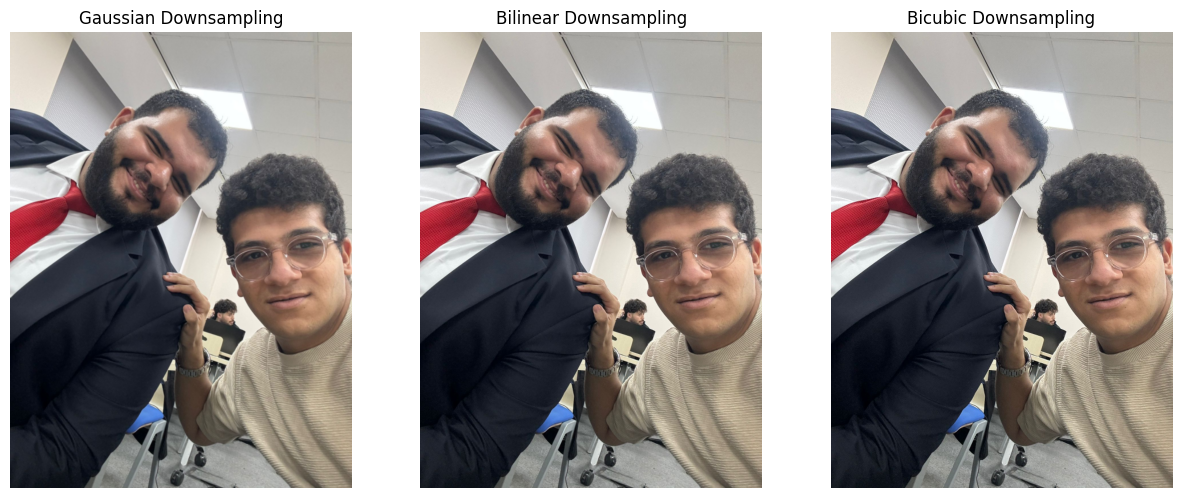

In [189]:
# Plot downsampled images
plot_image_and_histogram(downsampled_image_gaussian, 'gaussian Downsampling')
plot_image_and_histogram(bilinear_downsampled_image, 'Bilinear Downsampling')
plot_image_and_histogram(bicubic_downsampled_image, 'Bicubic Downsampling')

# Save images
cv2.imwrite('gaussian_downsampled_image.jpg', downsampled_image_gaussian)
cv2.imwrite('bilinear_downsampled_image.jpg', bilinear_downsampled_image)
cv2.imwrite('bicubic_downsampled_image.jpg', bicubic_downsampled_image)
print('Downsampled images saved successfully')

# Display images
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(downsampled_image_gaussian, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Gaussian Downsampling')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(bilinear_downsampled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bilinear Downsampling')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bicubic_downsampled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bicubic Downsampling')

plt.show()

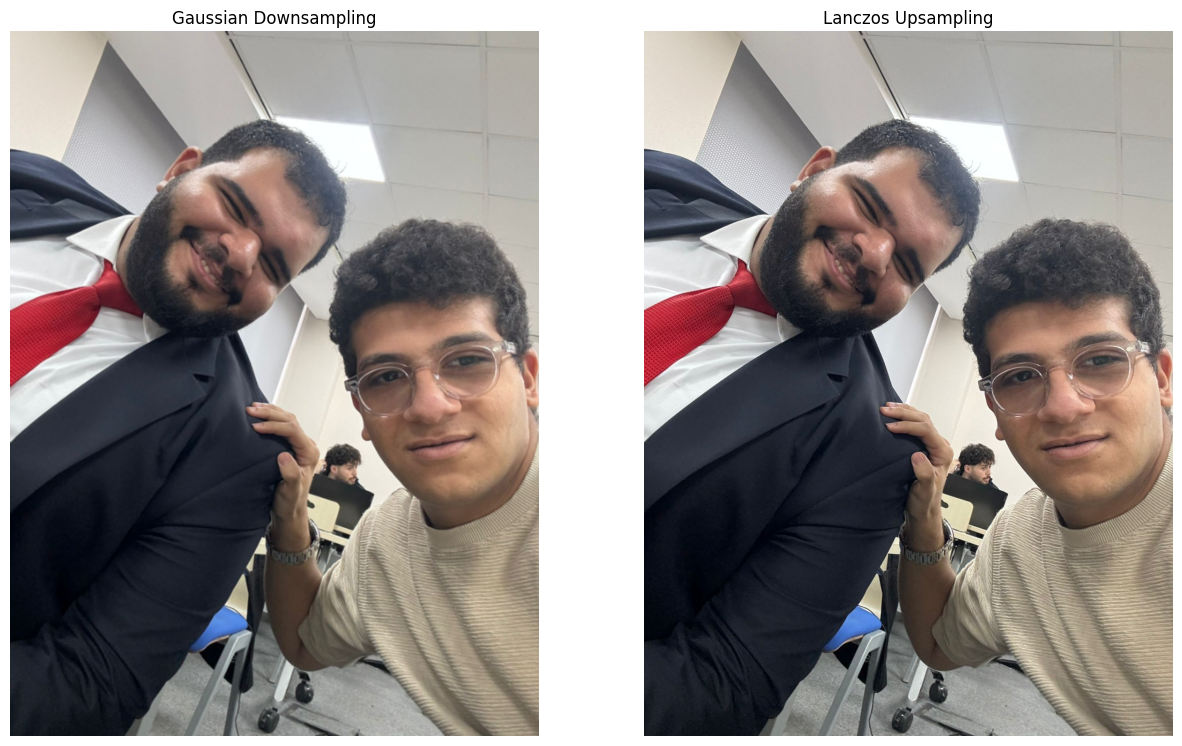

In [ ]:
# visualize the difference between gaussian downsampling and lanczos upsampling 
plt.figure(figsize=(15, 15))    
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(downsampled_image_gaussian, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Gaussian Downsampling')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(upsampled_image_lanczos, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Lanczos Upsampling')

plt.show()

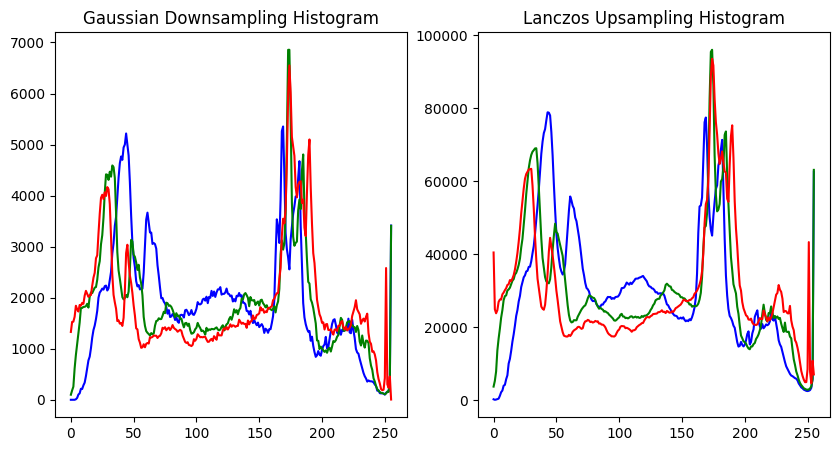

In [191]:
# visualize the difference between gaussian downsampling and lanczos upsampling histograms 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([downsampled_image_gaussian], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Gaussian Downsampling Histogram')

plt.subplot(1, 2, 2)
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([upsampled_image_lanczos], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Lanczos Upsampling Histogram')

plt.show()
